In [1]:
#@title uploader
file_id = "1VpSCc_ms2dj59bMAAOqCu0OI0jjb-8Hq" #@param {type:"string"}
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# PyDrive reference:
# https://googledrive.github.io/PyDrive/docs/build/html/index.html


from google.colab import auth
auth.authenticate_user()

from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

# Replace the assignment below with your file ID
# to download a different file.
#
# A file ID looks like: 1gLBqEWEBQDYbKCDigHnUXNTkzl-OslSO

import io
from googleapiclient.http import MediaIoBaseDownload

request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, done = downloader.next_chunk()

fileId = drive.CreateFile({'id': file_id }) #DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
print(fileId['title'])
fileId.GetContentFile(fileId['title'])  # Save Drive file as a local file

!unzip {fileId['title']}

widsdatathon2025.zip
Archive:  widsdatathon2025.zip
  inflating: Data Dictionary.xlsx    
  inflating: SAMPLE_SUBMISSION.xlsx  
  inflating: TEST/TEST_CATEGORICAL.xlsx  
  inflating: TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv  
  inflating: TEST/TEST_QUANTITATIVE_METADATA.xlsx  
  inflating: TRAIN/TRAINING_SOLUTIONS.xlsx  
  inflating: TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx  
  inflating: TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv  
  inflating: TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx  


## Data Prep

In [2]:
# I don't have this package so I'm installing it. If the cell below doesn't work
# for you, you might have to run this before.
!pip install geomstats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 45.8 MB/s eta 0:00:00


In [3]:
import geomstats.datasets.utils as data_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fcm = pd.read_csv("TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv")
fcm_solutions = pd.read_excel("TRAIN/TRAINING_SOLUTIONS.xlsx")
graph_fcm = fcm.merge(fcm_solutions, on="participant_id")

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [4]:
pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [5]:
pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.1 MB/s eta 0:00:00


## Data Exploration

In [ ]:
fcm.shape

(1213, 19901)

In [ ]:
fcm.describe()

,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,0throw_10thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,...,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,0.060553,0.122315,0.060268,0.041287,0.069722,0.091007,0.066852,0.000252,0.014128,-0.002914,...,0.011075,-0.004938,-0.004378,0.001610,0.115171,0.049984,0.058144,0.093527,0.089403,0.128946
std,0.064178,0.054026,0.057495,0.043491,0.044222,0.049189,0.046864,0.049046,0.038205,0.042462,...,0.049632,0.046536,0.042900,0.047424,0.057128,0.051664,0.057674,0.054594,0.058036,0.058490
min,-0.183279,-0.059932,-0.145566,-0.127827,-0.072043,-0.079184,-0.105722,-0.164297,-0.137728,-0.148490,...,-0.161666,-0.176523,-0.178688,-0.138048,-0.070094,-0.153540,-0.131455,-0.085566,-0.204160,-0.083077
25%,0.018482,0.086102,0.026548,0.014457,0.042462,0.057614,0.036934,-0.031358,-0.010635,-0.030538,...,-0.021376,-0.033424,-0.033798,-0.030132,0.080291,0.015827,0.022316,0.059621,0.053224,0.090459
50%,0.058276,0.123220,0.061339,0.043246,0.067066,0.086494,0.067247,0.002549,0.016130,-0.002604,...,0.010254,-0.004683,-0.003724,0.000990,0.113640,0.052705,0.059151,0.093397,0.088612,0.127913
75%,0.100103,0.154518,0.099056,0.068408,0.096504,0.119404,0.095117,0.031053,0.038770,0.024507,...,0.044165,0.024913,0.024007,0.032268,0.150524,0.082526,0.095192,0.127144,0.127613,0.166523
max,0.321522,0.390895,0.278429,0.189825,0.317500,0.316811,0.270018,0.168196,0.145364,0.128301,...,0.194616,0.183152,0.180562,0.192015,0.375635,0.228748,0.322084,0.348153,0.267162,0.414304


In [ ]:
fcm.isnull().sum().sum()

0

In [ ]:
fcm.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


I was going to graph below, but each participants fcms need to be a numpy array for this to work so it doesn't run for now.

In [ ]:

# Example data
# Assume `matrices` is a list of connectivity matrices (2D arrays) for all individuals
# Assume `labels` is a list of binary labels (0 or 1) corresponding to each individual

# Separate matrices into two groups based on labels
group_0 = [graph_fcm[i] for i in range(len(graph_fcm)) if graph_fcm.ADHD_Outcome[i] == 0]
group_1 = [graph_fcm[i] for i in range(len(graph_fcm)) if graph_fcm.ADHD_Outcome[i] == 1]

# Compute average connectivity matrices for each group
avg_matrix_0 = np.mean(group_0, axis=0)
avg_matrix_1 = np.mean(group_1, axis=0)

# Visualize the average matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot group 0
sns.heatmap(avg_matrix_0, ax=axes[0], cmap="coolwarm", vmin=0, vmax=1, square=True, cbar=True)
axes[0].set_title("Group 0 (Label = 0)")

# Plot group 1
sns.heatmap(avg_matrix_1, ax=axes[1], cmap="coolwarm", vmin=0, vmax=1, square=True, cbar=True)
axes[1].set_title("Group 1 (Label = 1)")

plt.tight_layout()
plt.show()

# Optional: Compute and visualize the difference between the two groups
difference_matrix = avg_matrix_1 - avg_matrix_0

plt.figure(figsize=(6, 6))
sns.heatmap(difference_matrix, cmap="coolwarm", center=0, square=True, cbar=True)
plt.title("Difference (Group 1 - Group 0)")
plt.show()

In [ ]:
graph_fcm.columns

Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn',
       '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn',
       '0throw_9thcolumn',
       ...
       '195throw_198thcolumn', '195throw_199thcolumn', '196throw_197thcolumn',
       '196throw_198thcolumn', '196throw_199thcolumn', '197throw_198thcolumn',
       '197throw_199thcolumn', '198throw_199thcolumn', 'ADHD_Outcome',
       'Sex_F'],
      dtype='object', length=19903)

In [ ]:
print(graph_fcm.isna().sum().sum()) #sum of missing values along all cols. shld be zero.

0


<h2> Data Exploration </h2>

Doesn't seem to be missing any values. Checking the distribution of ADHD_Outcome and Sex_F.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


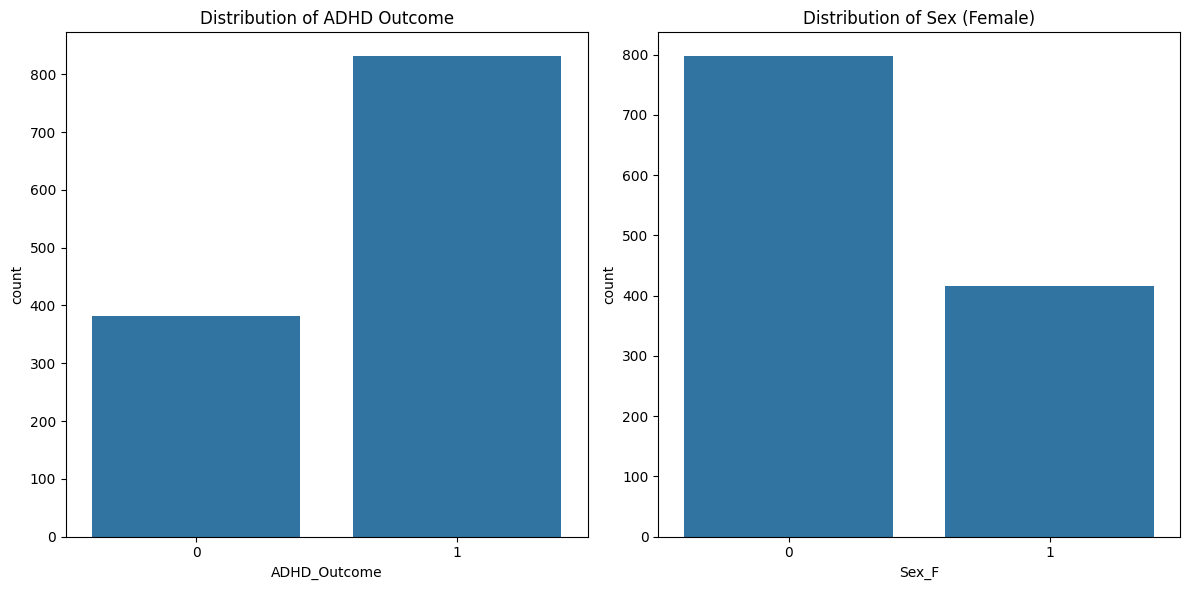

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='ADHD_Outcome', data=graph_fcm)
plt.title('Distribution of ADHD Outcome')

plt.subplot(1, 2, 2)
sns.countplot(x='Sex_F', data=graph_fcm)
plt.title('Distribution of Sex (Female)')

plt.tight_layout()
plt.show()


Ok looks like there is still way more male ADHD data than female. We can consider training on only the female if the accuracy is bad there. Now graphing the average connectivity of the matrices

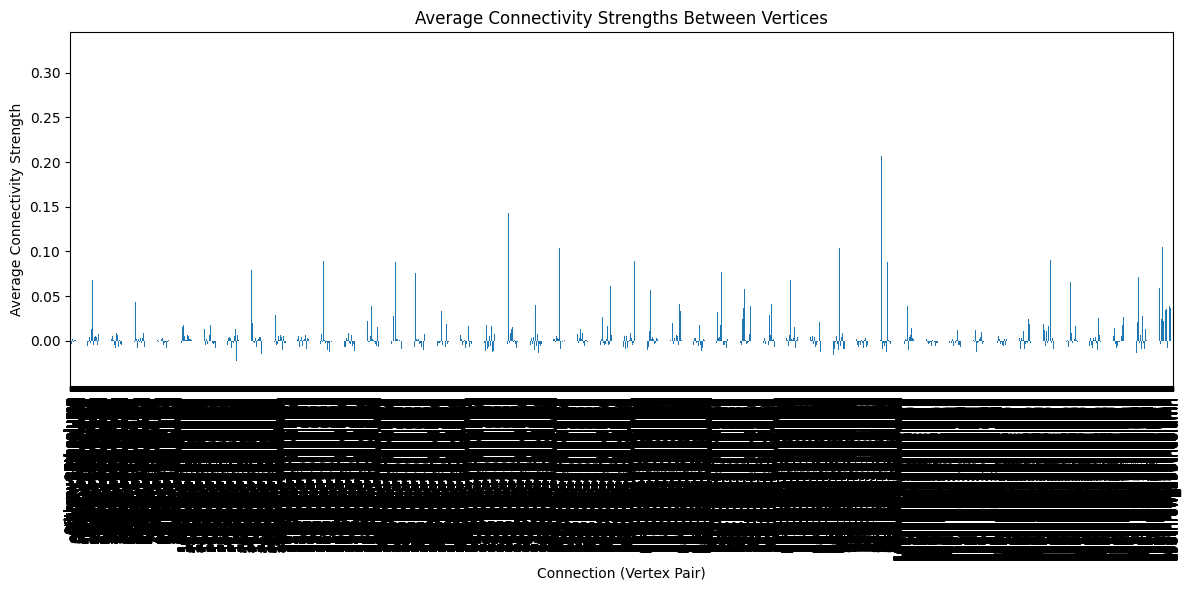

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract connectivity strength columns (excluding participant_id and ADHD_Outcome)
connectivity_columns = [col for col in graph_fcm.columns if col not in ['participant_id', 'ADHD_Outcome', 'Sex_F']]

# Calculate the average connectivity strength for each connection
average_connectivity = graph_fcm[connectivity_columns].mean()

# Create the plot
plt.figure(figsize=(12, 6))
average_connectivity.plot(kind='bar')
plt.xlabel('Connection (Vertex Pair)')
plt.ylabel('Average Connectivity Strength')
plt.title('Average Connectivity Strengths Between Vertices')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


<h2> FCM Graph Neural Network </h2>
AKA the hard part. Having a hard time keeping it from crashing; should follow the example architecture very carefully because we're dealing with a lot of data.

##GCN Summary

Can't seem to better than 0.6851

<h2> Google Collab Code </h2>

Aka runnable version of above code

| Label | Accuracy | Nodes |
|-------|----------|-------|
| ADHD  | 0.6851   | fully-connected |
|Sex_F  | 0.6570   | fully-connected |
| ADHD  | 0.8450   | half connected  |
| Sex_F | 0.8195   | half connected  |

### Class Weights to Minority

| Label | Accuracy |
|-------|----------|
| ADHD  | 0.5      |


### SMOTE - Oversampling minority


| Label | Accuracy |
|-------|----------|
| ADHD  | 0.5      |
|Sex_F  | 0.5      |

### Different GCN

| Label | Accuracy | Learning Rate |
|-------|----------|---------------|
| ADHD  | 0.6851   | 0.01          |
| ADHD  | 0.6851   | 0.05          |




## Google Collab Running Code
Runs!
Both have such high losses they are randomly guessing so.

Predicting ADHD

In [ ]:
#reset graph_fcm before running below cell
graph_fcm = fcm.merge(fcm_solutions, on="participant_id")

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import numpy as np  # Ensure NumPy is imported

# Check if GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Assuming 'graph_fcm' DataFrame is already loaded and preprocessed
# Remove 'Sex_F' column
graph_fcm = graph_fcm.drop('Sex_F', axis=1)

# Prepare data for PyTorch Geometric
connectivity_columns = [col for col in graph_fcm.columns if col not in ['participant_id', 'ADHD_Outcome']]
features = graph_fcm[connectivity_columns].values
labels = graph_fcm['ADHD_Outcome'].values

# Create an adjacency matrix (replace with actual adjacency if available)
num_nodes = features.shape[0]  # Ensure correct shape (number of samples, not features)
adjacency_matrix = np.ones((num_nodes, num_nodes))
np.fill_diagonal(adjacency_matrix, 0)  # No self-loops

# Convert to PyTorch tensors and move to device
data = Data(
    x=torch.tensor(features, dtype=torch.float32).to(device),
    edge_index=torch.tensor(np.array(np.where(adjacency_matrix)), dtype=torch.long).to(device),
    y=torch.tensor(labels, dtype=torch.long).to(device)
)


class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)


# Hyperparameters
in_channels = data.num_features
hidden_channels = 64
out_channels = 2  # Two classes: ADHD (1) and no ADHD (0)
learning_rate = 0.01
epochs = 200

# Model, optimizer, and loss function
model_adhd = GCN(in_channels, hidden_channels, out_channels).to(device)
optimizer = torch.optim.Adam(model_adhd.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

# Train the model
model_adhd.train()
for epoch in range(epochs):
    optimizer.zero_grad()
    out = model_adhd(data.x, data.edge_index)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation
model_adhd.eval()
_, pred = model_adhd(data.x, data.edge_index).max(dim=1)
correct = float(pred.eq(data.y).sum().item())
acc = correct / len(data.y)
print(f"Accuracy: {acc:.4f}")


Using device: cuda
Epoch 0, Loss: 0.6911
Epoch 50, Loss: 0.6272
Epoch 100, Loss: 0.6230
Epoch 150, Loss: 0.6230
Accuracy: 0.6851


Predicting Sex_F with same model as above

In [ ]:
#reset graph_fcm before running below cell
graph_fcm = fcm.merge(fcm_solutions, on="participant_id")

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import numpy as np  # Ensure NumPy is imported

# Check if GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Assuming 'graph_fcm' DataFrame is already loaded and preprocessed
# Remove 'Sex_F' column
graph_fcm = graph_fcm.drop('ADHD_Outcome', axis=1)

# Prepare data for PyTorch Geometric
connectivity_columns = [col for col in graph_fcm.columns if col not in ['participant_id', 'Sex_F']]
features = graph_fcm[connectivity_columns].values
labels = graph_fcm['Sex_F'].values

# Create an adjacency matrix (replace with actual adjacency if available)
num_nodes = features.shape[0]  # Ensure correct shape (number of samples, not features)
adjacency_matrix = np.ones((num_nodes, num_nodes))
np.fill_diagonal(adjacency_matrix, 0)  # No self-loops

# Convert to PyTorch tensors and move to device
data = Data(
    x=torch.tensor(features, dtype=torch.float32).to(device),
    edge_index=torch.tensor(np.array(np.where(adjacency_matrix)), dtype=torch.long).to(device),
    y=torch.tensor(labels, dtype=torch.long).to(device)
)


class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)


# Hyperparameters
in_channels = data.num_features
hidden_channels = 64
out_channels = 2  # Two classes: ADHD (1) and no ADHD (0)
learning_rate = 0.01
epochs = 200

# Model, optimizer, and loss function
model_f = GCN(in_channels, hidden_channels, out_channels).to(device)
optimizer = torch.optim.Adam(model_f.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

# Train the model
model_f.train()
for epoch in range(epochs):
    optimizer.zero_grad()
    out = model_f(data.x, data.edge_index)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation
model_f.eval()
_, pred = model_f(data.x, data.edge_index).max(dim=1)
correct = float(pred.eq(data.y).sum().item())
acc = correct / len(data.y)
print(f"Accuracy: {acc:.4f}")


Using device: cuda
Epoch 0, Loss: 0.6920
Epoch 50, Loss: 0.6448
Epoch 100, Loss: 0.6430
Epoch 150, Loss: 0.6430
Accuracy: 0.6570


## Adding Class Weights to Above Models

To add more weight to minority classes (female and non-adhd) to see if it improves model accuracy because without it, the testing model just guessed not female and has adhd for every participant ;,(. unchanging loss means it's stuck in confusion

### ADHD_Outcome

Basically same outcome so i didn't try it on Sex_f

In [ ]:
#reset graph_fcm before running below cell
graph_fcm = fcm.merge(fcm_solutions, on="participant_id")

import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import numpy as np  # Ensure NumPy is imported
from sklearn.utils.class_weight import compute_class_weight #for weightsi

# Check if GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Assuming 'graph_fcm' DataFrame is already loaded and preprocessed
# Remove 'Sex_F' column
graph_fcm = graph_fcm.drop('Sex_F', axis=1)

# Prepare data for PyTorch Geometric
connectivity_columns = [col for col in graph_fcm.columns if col not in ['participant_id', 'ADHD_Outcome']]
features = graph_fcm[connectivity_columns].values
labels = graph_fcm['ADHD_Outcome'].values

# Create an adjacency matrix (replace with actual adjacency if available)
num_nodes = features.shape[0]  # Ensure correct shape (number of samples, not features)
adjacency_matrix = np.ones((num_nodes, num_nodes))
np.fill_diagonal(adjacency_matrix, 0)  # No self-loops

# Convert to PyTorch tensors and move to device
data = Data(
    x=torch.tensor(features, dtype=torch.float32).to(device),
    edge_index=torch.tensor(np.array(np.where(adjacency_matrix)), dtype=torch.long).to(device),
    y=torch.tensor(labels, dtype=torch.long).to(device)
)


class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)


# Hyperparameters
in_channels = data.num_features
hidden_channels = 64
out_channels = 2  # Two classes: ADHD (1) and no ADHD (0)
learning_rate = 0.01
epochs = 200

#Weights
#compute weights
labels_np = labels.astype(int)
class_weights = compute_class_weight('balanced', classes=np.unique(labels_np), y=labels_np)
#convert to pytorch tensor and move to device
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Model, optimizer, and loss function
model_adhd = GCN(in_channels, hidden_channels, out_channels).to(device)
optimizer = torch.optim.Adam(model_adhd.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss(weight=class_weights) #add argument to this to account for weights

# Train the model
model_adhd.train()
for epoch in range(epochs):
    optimizer.zero_grad()
    out = model_adhd(data.x, data.edge_index)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation
model_adhd.eval()
_, pred = model_adhd(data.x, data.edge_index).max(dim=1)
correct = float(pred.eq(data.y).sum().item())
acc = correct / len(data.y)
print(f"Accuracy: {acc:.4f}")


Using device: cuda
Epoch 0, Loss: 0.6932
Epoch 50, Loss: 0.6932
Epoch 100, Loss: 0.6931
Epoch 150, Loss: 0.6931
Accuracy: 0.6851


In [ ]:
from collections import Counter
print(Counter(pred.tolist()))


Counter({0: 954, 1: 259})


## Using oversampling of minority class

Using SMOTE (Synthetic Minority Over-sampling Technique) (did even worse, also stuck)

ADHD outcome

50% is worse bruh

In [ ]:
#reset graph_fcm before running below cell
graph_fcm = fcm.merge(fcm_solutions, on="participant_id")

import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import numpy as np  # Ensure NumPy is imported

# Check if GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Assuming 'graph_fcm' DataFrame is already loaded and preprocessed
# Remove 'Sex_F' column
graph_fcm = graph_fcm.drop('Sex_F', axis=1)

# Prepare data for PyTorch Geometric
connectivity_columns = [col for col in graph_fcm.columns if col not in ['participant_id', 'ADHD_Outcome']]
features = graph_fcm[connectivity_columns].values
labels = graph_fcm['ADHD_Outcome'].values

########### BALANCING MINORITIES ###############
# identifying minority class in tester (no ADHD is minority in training, might not be for tester but i doubt it, but we'll check anyways)
minority_class = 0 if np.sum(labels == 1) > np.sum(labels == 0) else 1

minority_indices = np.where(labels == minority_class)[0]
majority_indices = np.where(labels != minority_class)[0]

#ovesample minority bu duplicating them
num_minority_needed = len(majority_indices) - len(minority_indices)
oversampled_minority_indices = np.random.choice(minority_indices, num_minority_needed, replace=True)

#combine all new duplicated min. with original where minority and majority class are balanced
balanced_indices = np.concatenate([majority_indices, minority_indices, oversampled_minority_indices])

# get new features and labels
features_balanced = features[balanced_indices]
labels_balanced = labels[balanced_indices]

#################################################
# Create an adjacency matrix (replace with actual adjacency if available)
num_nodes = features_balanced.shape[0]  # CHANGED TO FATURED_BALANCED // Ensure correct shape (number of samples, not features)
adjacency_matrix = np.ones((num_nodes, num_nodes))
np.fill_diagonal(adjacency_matrix, 0)  # No self-loops

# Convert to PyTorch tensors and move to device (change to featured_balanced)
data = Data(
    x=torch.tensor(features_balanced, dtype=torch.float32).to(device),
    edge_index=torch.tensor(np.array(np.where(adjacency_matrix)), dtype=torch.long).to(device),
    y=torch.tensor(labels_balanced, dtype=torch.long).to(device)
)


class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)


# Hyperparameters
in_channels = data.num_features
hidden_channels = 64
out_channels = 2  # Two classes: ADHD (1) and no ADHD (0)
learning_rate = 0.01
epochs = 200


# Model, optimizer, and loss function
model_adhd = GCN(in_channels, hidden_channels, out_channels).to(device)
optimizer = torch.optim.Adam(model_adhd.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

# Train the model
model_adhd.train()
for epoch in range(epochs):
    optimizer.zero_grad()
    out = model_adhd(data.x, data.edge_index)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation
model_adhd.eval()
_, pred = model_adhd(data.x, data.edge_index).max(dim=1)
correct = float(pred.eq(data.y).sum().item())
acc = correct / len(data.y)
print(f"Accuracy: {acc:.4f}")


Using device: cuda
Epoch 0, Loss: 0.6932
Epoch 50, Loss: 0.6931
Epoch 100, Loss: 0.6931
Epoch 150, Loss: 0.6931
Accuracy: 0.5000


Sex_f bc why not

same result

In [ ]:
#reset graph_fcm before running below cell
graph_fcm = fcm.merge(fcm_solutions, on="participant_id")

import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import numpy as np  # Ensure NumPy is imported

# Check if GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Assuming 'graph_fcm' DataFrame is already loaded and preprocessed
# Remove 'Sex_F' column
graph_fcm = graph_fcm.drop('ADHD_Outcome', axis=1)

# Prepare data for PyTorch Geometric
connectivity_columns = [col for col in graph_fcm.columns if col not in ['participant_id', 'Sex_F']]
features = graph_fcm[connectivity_columns].values
labels = graph_fcm['Sex_F'].values

########### BALANCING MINORITIES ###############
# identifying minority class in tester (no ADHD is minority in training, might not be for tester but i doubt it, but we'll check anyways)
minority_class = 0 if np.sum(labels == 1) > np.sum(labels == 0) else 1

minority_indices = np.where(labels == minority_class)[0]
majority_indices = np.where(labels != minority_class)[0]

#ovesample minority bu duplicating them
num_minority_needed = len(majority_indices) - len(minority_indices)
oversampled_minority_indices = np.random.choice(minority_indices, num_minority_needed, replace=True)

#combine all new duplicated min. with original where minority and majority class are balanced
balanced_indices = np.concatenate([majority_indices, minority_indices, oversampled_minority_indices])

# get new features and labels
features_balanced = features[balanced_indices]
labels_balanced = labels[balanced_indices]

#################################################
# Create an adjacency matrix (replace with actual adjacency if available)
num_nodes = features_balanced.shape[0]  # CHANGED TO FATURED_BALANCED // Ensure correct shape (number of samples, not features)
adjacency_matrix = np.ones((num_nodes, num_nodes))
np.fill_diagonal(adjacency_matrix, 0)  # No self-loops

# Convert to PyTorch tensors and move to device (change to featured_balanced)
data = Data(
    x=torch.tensor(features_balanced, dtype=torch.float32).to(device),
    edge_index=torch.tensor(np.array(np.where(adjacency_matrix)), dtype=torch.long).to(device),
    y=torch.tensor(labels_balanced, dtype=torch.long).to(device)
)


class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)


# Hyperparameters
in_channels = data.num_features
hidden_channels = 64
out_channels = 2  # Two classes: ADHD (1) and no ADHD (0)
learning_rate = 0.01
epochs = 200


# Model, optimizer, and loss function
model_adhd = GCN(in_channels, hidden_channels, out_channels).to(device)
optimizer = torch.optim.Adam(model_adhd.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

# Train the model
model_adhd.train()
for epoch in range(epochs):
    optimizer.zero_grad()
    out = model_adhd(data.x, data.edge_index)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation
model_adhd.eval()
_, pred = model_adhd(data.x, data.edge_index).max(dim=1)
correct = float(pred.eq(data.y).sum().item())
acc = correct / len(data.y)
print(f"Accuracy: {acc:.4f}")


Using device: cuda
Epoch 0, Loss: 0.6935
Epoch 50, Loss: 0.6932
Epoch 100, Loss: 0.6931
Epoch 150, Loss: 0.6931
Accuracy: 0.5000


## Trying more GCN Model

More layers, BatchNorm, ReLU, and Dropout (prevent overfitting) (still stuck/guessing)

ADHD_Outcome

In [ ]:
#reset graph_fcm before running below cell
graph_fcm = fcm.merge(fcm_solutions, on="participant_id")

import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import numpy as np  # Ensure NumPy is imported

# Check if GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Assuming 'graph_fcm' DataFrame is already loaded and preprocessed
# Remove 'Sex_F' column
graph_fcm = graph_fcm.drop('Sex_F', axis=1)

# Prepare data for PyTorch Geometric
connectivity_columns = [col for col in graph_fcm.columns if col not in ['participant_id', 'ADHD_Outcome']]
features = graph_fcm[connectivity_columns].values
labels = graph_fcm['ADHD_Outcome'].values

# Create an adjacency matrix (replace with actual adjacency if available)
num_nodes = features.shape[0]  # Ensure correct shape (number of samples, not features)
adjacency_matrix = np.ones((num_nodes, num_nodes))
np.fill_diagonal(adjacency_matrix, 0)  # No self-loops

# Convert to PyTorch tensors and move to device
data = Data(
    x=torch.tensor(features, dtype=torch.float32).to(device),
    edge_index=torch.tensor(np.array(np.where(adjacency_matrix)), dtype=torch.long).to(device),
    y=torch.tensor(labels, dtype=torch.long).to(device)
)


class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.bn1 = torch.nn.BatchNorm1d(hidden_channels) #batch norm
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.bn2 = torch.nn.BatchNorm1d(hidden_channels)
        self.conv3 = GCNConv(hidden_channels, out_channels)
        self.dropout = torch.nn.Dropout(0.5) #dropout

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout(x)

        x = self.conv2(x, edge_index)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout(x)

        x = self.conv3(x, edge_index)
        return F.log_softmax(x, dim=1)


# Hyperparameters
in_channels = data.num_features
hidden_channels = 64
out_channels = 2  # Two classes: ADHD (1) and no ADHD (0)
learning_rate = 0.05
epochs = 200

# Model, optimizer, and loss function
model_adhd = GCN(in_channels, hidden_channels, out_channels).to(device)
optimizer = torch.optim.Adam(model_adhd.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

# Train the model
model_adhd.train()
for epoch in range(epochs):
    optimizer.zero_grad()
    out = model_adhd(data.x, data.edge_index)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation
model_adhd.eval()
_, pred = model_adhd(data.x, data.edge_index).max(dim=1)
correct = float(pred.eq(data.y).sum().item())
acc = correct / len(data.y)
print(f"Accuracy: {acc:.4f}")


Using device: cuda
Epoch 0, Loss: 0.6931
Epoch 50, Loss: 0.6230
Epoch 100, Loss: 0.6230
Epoch 150, Loss: 0.6230
Accuracy: 0.6851


## Trying Less Connected Graph

half connected
Overall: BETTER OUTCOME! .72 on submission

1/3 connected
Overall: Worse, 0.71 on submission

ADHD Outcome






In [14]:
#reset graph_fcm before running below cell
graph_fcm = fcm.merge(fcm_solutions, on="participant_id")


import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import numpy as np  # Ensure NumPy is imported

# Check if GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Assuming 'graph_fcm' DataFrame is already loaded and preprocessed
# Remove 'Sex_F' column
graph_fcm = graph_fcm.drop('Sex_F', axis=1)

# Prepare data for PyTorch Geometric
connectivity_columns = [col for col in graph_fcm.columns if col not in ['participant_id', 'ADHD_Outcome']]
features = graph_fcm[connectivity_columns].values
labels = graph_fcm['ADHD_Outcome'].values

# Create an adjacency matrix (replace with actual adjacency if available)
num_nodes = features.shape[0]  # Ensure correct shape (number of samples, not features)
adjacency_matrix = np.ones(((int)(num_nodes/2.5), (int)(num_nodes/2.5))) #LITERALLY JUST DIVIDED IN HALF SO ITS NOT FULLY CONNECTED ITS HALF CONNECTED?
np.fill_diagonal(adjacency_matrix, 0)  # No self-loops

# Convert to PyTorch tensors and move to device
data = Data(
    x=torch.tensor(features, dtype=torch.float32).to(device),
    edge_index=torch.tensor(np.array(np.where(adjacency_matrix)), dtype=torch.long).to(device),
    y=torch.tensor(labels, dtype=torch.long).to(device)
)


class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)


# Hyperparameters
in_channels = data.num_features
hidden_channels = 64
out_channels = 2  # Two classes: ADHD (1) and no ADHD (0)
learning_rate = 0.01
epochs = 200

# Model, optimizer, and loss function
model_adhd = GCN(in_channels, hidden_channels, out_channels).to(device)
optimizer = torch.optim.Adam(model_adhd.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

# Train the model
model_adhd.train()
for epoch in range(epochs):
    optimizer.zero_grad()
    out = model_adhd(data.x, data.edge_index)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation
model_adhd.eval()
_, pred = model_adhd(data.x, data.edge_index).max(dim=1)
correct = float(pred.eq(data.y).sum().item())
acc = correct / len(data.y)
print(f"Accuracy: {acc:.4f}")


Using device: cuda
Epoch 0, Loss: 0.7029
Epoch 50, Loss: 0.4586
Epoch 100, Loss: 0.3809
Epoch 150, Loss: 0.3373
Accuracy: 0.8813


Same model as above, but train test splitting the data. like in the submission, test accuracy is 70 ish, overfitting on training



In [15]:
#reset graph_fcm before running below cell
graph_fcm = fcm.merge(fcm_solutions, on="participant_id")

# Import necessary libraries
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import numpy as np
from sklearn.model_selection import train_test_split

# Check if GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Assuming 'graph_fcm' DataFrame is already loaded and preprocessed
# Remove 'Sex_F' column
graph_fcm = graph_fcm.drop('Sex_F', axis=1)

# Prepare data for PyTorch Geometric
connectivity_columns = [col for col in graph_fcm.columns if col not in ['participant_id', 'ADHD_Outcome']]
features = graph_fcm[connectivity_columns].values
labels = graph_fcm['ADHD_Outcome'].values

# Create an adjacency matrix (placeholder, adjust as needed)
num_nodes = features.shape[0]
adjacency_matrix = np.ones(((int)(num_nodes/3), (int)(num_nodes/3))) #LITERALLY JUST DIVIDED IN HALF SO ITS NOT FULLY CONNECTED ITS HALF CONNECTED?
np.fill_diagonal(adjacency_matrix, 0)  # No self-loops

# Convert to PyTorch tensors and move to device
data = Data(
    x=torch.tensor(features, dtype=torch.float32).to(device),
    edge_index=torch.tensor(np.array(np.where(adjacency_matrix)), dtype=torch.long).to(device),
    y=torch.tensor(labels, dtype=torch.long).to(device)
)

# Create train/test split indices
train_idx, test_idx = train_test_split(np.arange(num_nodes), test_size=0.2, random_state=42)

# Convert to PyTorch tensors
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)
train_mask[train_idx] = True
test_mask[test_idx] = True

# Add masks to the data object
data.train_mask = train_mask.to(device)
data.test_mask = test_mask.to(device)


# Define the GCN model
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)


# Hyperparameters
in_channels = data.num_features
hidden_channels = 64
out_channels = 2  # Two classes: ADHD (1) and no ADHD (0)
learning_rate = 0.01
epochs = 200

# Model, optimizer, and loss function
model_adhd = GCN(in_channels, hidden_channels, out_channels).to(device)
optimizer = torch.optim.Adam(model_adhd.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

# Train the model
model_adhd.train()
for epoch in range(epochs):
    optimizer.zero_grad()
    out = model_adhd(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Only train on train set
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation on test set
model_adhd.eval()
_, pred = model_adhd(data.x, data.edge_index).max(dim=1)
correct = float(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
acc = correct / data.test_mask.sum().item()
print(f"Test Accuracy: {acc:.4f}")


Using device: cuda
Epoch 0, Loss: 0.6817
Epoch 50, Loss: 0.3798
Epoch 100, Loss: 0.3789
Epoch 150, Loss: 0.3755
Test Accuracy: 0.7037


Sex_F

In [16]:
#reset graph_fcm before running below cell
graph_fcm = fcm.merge(fcm_solutions, on="participant_id")


import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import numpy as np  # Ensure NumPy is imported

# Check if GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Assuming 'graph_fcm' DataFrame is already loaded and preprocessed
# Remove 'Sex_F' column
graph_fcm = graph_fcm.drop('ADHD_Outcome', axis=1)

# Prepare data for PyTorch Geometric
connectivity_columns = [col for col in graph_fcm.columns if col not in ['participant_id', 'Sex_F']]
features = graph_fcm[connectivity_columns].values
labels = graph_fcm['Sex_F'].values

# Create an adjacency matrix (replace with actual adjacency if available)
num_nodes = features.shape[0]  # Ensure correct shape (number of samples, not features)
adjacency_matrix = np.ones(((int)(num_nodes/2.5), (int)(num_nodes/2.5)))
np.fill_diagonal(adjacency_matrix, 0)  # No self-loops

# Convert to PyTorch tensors and move to device
data = Data(
    x=torch.tensor(features, dtype=torch.float32).to(device),
    edge_index=torch.tensor(np.array(np.where(adjacency_matrix)), dtype=torch.long).to(device),
    y=torch.tensor(labels, dtype=torch.long).to(device)
)


class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)


# Hyperparameters
in_channels = data.num_features
hidden_channels = 64
out_channels = 2  # Two classes: ADHD (1) and no ADHD (0)
learning_rate = 0.01
epochs = 200

# Model, optimizer, and loss function
model_f = GCN(in_channels, hidden_channels, out_channels).to(device)
optimizer = torch.optim.Adam(model_f.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

# Train the model
model_f.train()
for epoch in range(epochs):
    optimizer.zero_grad()
    out = model_f(data.x, data.edge_index)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation
model_f.eval()
_, pred = model_f(data.x, data.edge_index).max(dim=1)
correct = float(pred.eq(data.y).sum().item())
acc = correct / len(data.y)
print(f"Accuracy: {acc:.4f}")


Using device: cuda
Epoch 0, Loss: 0.6963
Epoch 50, Loss: 0.5400
Epoch 100, Loss: 0.5097
Epoch 150, Loss: 0.5193
Accuracy: 0.8607


doing the same here - adding train/test checking on this model. looks like it's overfitting on the training, since training is 87% but test is only 62%

In [17]:
graph_fcm = fcm.merge(fcm_solutions, on="participant_id")

# Import necessary libraries
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import numpy as np
from sklearn.model_selection import train_test_split

# Check if GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Assuming 'graph_fcm' DataFrame is already loaded and preprocessed
# Remove 'ADHD_Outcome' column
graph_fcm = graph_fcm.drop('ADHD_Outcome', axis=1)

# Prepare data for PyTorch Geometric
connectivity_columns = [col for col in graph_fcm.columns if col not in ['participant_id', 'Sex_F']]
features = graph_fcm[connectivity_columns].values
labels = graph_fcm['Sex_F'].values

# Create an adjacency matrix (placeholder, adjust as needed)
num_nodes = features.shape[0]
adjacency_matrix = np.ones((num_nodes, num_nodes))  # Fully connected
np.fill_diagonal(adjacency_matrix, 0)  # No self-loops

# Convert to PyTorch tensors and move to device
data = Data(
    x=torch.tensor(features, dtype=torch.float32).to(device),
    edge_index=torch.tensor(np.array(np.where(adjacency_matrix)), dtype=torch.long).to(device),
    y=torch.tensor(labels, dtype=torch.long).to(device)
)

# Create train/test split indices
train_idx, test_idx = train_test_split(np.arange(num_nodes), test_size=0.2, random_state=42)

# Convert to PyTorch tensors
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)
train_mask[train_idx] = True
test_mask[test_idx] = True

# Add masks to the data object
data.train_mask = train_mask.to(device)
data.test_mask = test_mask.to(device)


# Define the GCN model
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)


# Hyperparameters
in_channels = data.num_features
hidden_channels = 64
out_channels = 2  # Two classes: Female (1) and Male (0)
learning_rate = 0.01
epochs = 200

# Model, optimizer, and loss function
model_f = GCN(in_channels, hidden_channels, out_channels).to(device)
optimizer = torch.optim.Adam(model_f.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

# Train the model
model_f.train()
for epoch in range(epochs):
    optimizer.zero_grad()
    out = model_f(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Only train on train set
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation on test set
model_f.eval()
_, pred = model_f(data.x, data.edge_index).max(dim=1)
correct = float(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
acc = correct / data.test_mask.sum().item()
print(f"Test Accuracy: {acc:.4f}")


Using device: cuda
Epoch 0, Loss: 0.6911
Epoch 50, Loss: 0.6409
Epoch 100, Loss: 0.6384
Epoch 150, Loss: 0.6384
Test Accuracy: 0.6296


## ADHD Parameters with Optuna (don't need to rerun)

<h2> getting the hyperparameters

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.4 MB/s eta 0:00:00


In [ ]:
import optuna
graph_fcm = fcm.merge(fcm_solutions, on="participant_id")

# Assuming 'graph_fcm' DataFrame is already loaded and preprocessed
connectivity_columns = [col for col in graph_fcm.columns if col not in ['participant_id', 'ADHD_Outcome','Sex_F']]
features = graph_fcm[connectivity_columns].values
labels = graph_fcm['ADHD_Outcome'].values
data = Data(
    x=torch.tensor(features, dtype=torch.float32).to(device),
    edge_index=torch.tensor(np.array(np.where(adjacency_matrix)), dtype=torch.long).to(device),
    y=torch.tensor(labels, dtype=torch.long).to(device)
)

# Define the objective function
def objective(trial):
    hidden_channels = trial.suggest_categorical('hidden_channels', [16, 32, 64, 128])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.2, 0.6)
    weight_decay = trial.suggest_loguniform('weight_decay', 1e-6, 1e-3)

    class GCN(torch.nn.Module):
        def __init__(self, in_channels, hidden_channels, out_channels):
            super().__init__()
            self.conv1 = GCNConv(in_channels, hidden_channels)
            self.conv2 = GCNConv(hidden_channels, out_channels)

        def forward(self, x, edge_index):
            x = self.conv1(x, edge_index)
            x = F.relu(x)
            x = F.dropout(x, p=dropout_rate, training=self.training)
            x = self.conv2(x, edge_index)
            return F.log_softmax(x, dim=1)

    # Initialize model and optimizer
    model = GCN(data.num_features, hidden_channels, 2).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    criterion = torch.nn.CrossEntropyLoss()

    # Training loop
    model.train()
    for epoch in range(100):  # Train for 100 epochs
        optimizer.zero_grad()
        out = model(data.x, data.edge_index)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    _, pred = model(data.x, data.edge_index).max(dim=1)
    correct = float(pred.eq(data.y).sum().item())
    acc = correct / len(data.y)

    return acc  # Optuna will maximize accuracy

# Run the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print best parameters
print("Best hyperparameters:", study.best_params)


[I 2025-03-03 02:06:49,100] A new study created in memory with name: no-name-abc11bfe-8cd5-46f7-8a62-4a9aede266ba
<ipython-input-31-b35fec2a0bb5>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
<ipython-input-31-b35fec2a0bb5>:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.2, 0.6)
<ipython-input-31-b35fec2a0bb5>:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('w

Best hyperparameters: {'hidden_channels': 64, 'learning_rate': 0.00021633938235848677, 'dropout_rate': 0.22806633854702552, 'weight_decay': 7.937180286936818e-05}


##ADHD model with optuna optimized (90% train)

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

graph_fcm = fcm.merge(fcm_solutions, on="participant_id")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming 'graph_fcm' DataFrame is already loaded and preprocessed
connectivity_columns = [col for col in graph_fcm.columns if col not in ['participant_id', 'ADHD_Outcome','Sex_F']]
features = graph_fcm[connectivity_columns].values
labels = graph_fcm['ADHD_Outcome'].values

# Define the GCN model with best hyperparameters
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout_rate):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.dropout_rate = dropout_rate

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout_rate, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Create an adjacency matrix (adjust as needed)
num_nodes = features.shape[0]
adjacency_matrix = np.ones(((int)(num_nodes/3), (int)(num_nodes/3)))  # Example adjacency structure
np.fill_diagonal(adjacency_matrix, 0)  # No self-loops

data = Data(
    x=torch.tensor(features, dtype=torch.float32).to(device),
    edge_index=torch.tensor(np.array(np.where(adjacency_matrix)), dtype=torch.long).to(device),
    y=torch.tensor(labels, dtype=torch.long).to(device)
)

# Hyperparameters
hidden_channels = 32
learning_rate = 0.000169
dropout_rate = 0.394
weight_decay = 5.93e-05
epochs = 200
patience = 10  # Early stopping patience

# Initialize model
adhd_model = GCN(data.num_features, hidden_channels, 2, dropout_rate).to(device)
optimizer = torch.optim.Adam(adhd_model.parameters(), lr=learning_rate, weight_decay=weight_decay)
criterion = torch.nn.CrossEntropyLoss()

# Early stopping variables
best_val_loss = float('inf')
counter = 0

# Training loop with early stopping
adhd_model.train()
for epoch in range(epochs):
    optimizer.zero_grad()
    out = adhd_model(data.x, data.edge_index)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()

    # Early stopping condition
    if loss.item() < best_val_loss:
        best_val_loss = loss.item()
        counter = 0
    else:
        counter += 1

    if counter >= patience:
        print(f"Early stopping at epoch {epoch}")
        break

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation
adhd_model.eval()
_, pred = adhd_model(data.x, data.edge_index).max(dim=1)
correct = float(pred.eq(data.y).sum().item())
acc = correct / len(data.y)
print(f"Train Accuracy: {acc:.4f}")


Epoch 0, Loss: 0.7020
Epoch 50, Loss: 0.4000
Epoch 100, Loss: 0.2906
Epoch 150, Loss: 0.2470
Train Accuracy: 0.9060


In [ ]:
pred_cpu = pred.cpu()

# Convert the tensor to a NumPy array
array = pred_cpu.numpy()

# Create a DataFrame from the NumPy array
df = pd.DataFrame(array, columns=['Values'])
df.describe()

,Values
count,1213.000000
mean,0.779060
std,0.415051
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


## ADHD model testing generalization (incomplete)

In [ ]:
graph_fcm = fcm.merge(fcm_solutions, on="participant_id")

import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming 'graph_fcm' DataFrame is already loaded and preprocessed
connectivity_columns = [col for col in graph_fcm.columns if col not in ['participant_id', 'ADHD_Outcome']]
features = graph_fcm[connectivity_columns].values
labels = graph_fcm['ADHD_Outcome'].values

# Create an adjacency matrix (adjust as needed)
num_nodes = features.shape[0]
adjacency_matrix = np.ones(((int)(num_nodes/3), (int)(num_nodes/3)))  # Example adjacency structure
np.fill_diagonal(adjacency_matrix, 0)  # No self-loops

# Convert to PyTorch tensors
data = Data(
    x=torch.tensor(features, dtype=torch.float32),
    edge_index=torch.tensor(np.array(np.where(adjacency_matrix)), dtype=torch.long),
    y=torch.tensor(labels, dtype=torch.long)
)

# Create train/test split indices
train_idx, test_idx = train_test_split(np.arange(num_nodes), test_size=0.2, random_state=42)

# Convert to PyTorch tensors
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)
train_mask[train_idx] = True
test_mask[test_idx] = True

# Add masks to the data object
data.train_mask = train_mask
data.test_mask = test_mask

# Define the GCN model with best hyperparameters
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout_rate):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.dropout_rate = dropout_rate

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout_rate, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Hyperparameters
hidden_channels = 32
learning_rate = 0.000169
dropout_rate = 0.394
weight_decay = 5.93e-05
epochs = 200
patience = 10  # Early stopping patience

# Initialize model
model = GCN(data.num_features, hidden_channels, 2, dropout_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
criterion = torch.nn.CrossEntropyLoss()

# Early stopping variables
best_val_loss = float('inf')
counter = 0

# Training loop with early stopping
model.train()
for epoch in range(epochs):
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Only train on train set
    loss.backward()
    optimizer.step()

    # Early stopping condition
    if loss.item() < best_val_loss:
        best_val_loss = loss.item()
        counter = 0
    else:
        counter += 1

    if counter >= patience:
        print(f"Early stopping at epoch {epoch}")
        break

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation on test set
model.eval()
_, pred = model(data.x, data.edge_index).max(dim=1)
correct = float(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
acc = correct / data.test_mask.sum().item()
print(f"Test Accuracy: {acc:.4f}")


Epoch 0, Loss: 0.7102
Epoch 50, Loss: 0.3770
Epoch 100, Loss: 0.2727
Epoch 150, Loss: 0.2382
Test Accuracy: 0.7037


## Optuna predicting Sex_F (don't need to rerun)

In [ ]:
import optuna
graph_fcm = fcm.merge(fcm_solutions, on="participant_id")

# Assuming 'graph_fcm' DataFrame is already loaded and preprocessed
connectivity_columns = [col for col in graph_fcm.columns if col not in ['participant_id', 'ADHD_Outcome','Sex_F']]
features = graph_fcm[connectivity_columns].values
labels = graph_fcm['Sex_F'].values
data = Data(
    x=torch.tensor(features, dtype=torch.float32).to(device),
    edge_index=torch.tensor(np.array(np.where(adjacency_matrix)), dtype=torch.long).to(device),
    y=torch.tensor(labels, dtype=torch.long).to(device)
)

# Define the objective function
def objective(trial):
    hidden_channels = trial.suggest_categorical('hidden_channels', [16, 32, 64, 128])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.2, 0.6)
    weight_decay = trial.suggest_loguniform('weight_decay', 1e-6, 1e-3)

    class GCN(torch.nn.Module):
        def __init__(self, in_channels, hidden_channels, out_channels):
            super().__init__()
            self.conv1 = GCNConv(in_channels, hidden_channels)
            self.conv2 = GCNConv(hidden_channels, out_channels)

        def forward(self, x, edge_index):
            x = self.conv1(x, edge_index)
            x = F.relu(x)
            x = F.dropout(x, p=dropout_rate, training=self.training)
            x = self.conv2(x, edge_index)
            return F.log_softmax(x, dim=1)

    # Initialize model and optimizer
    model = GCN(data.num_features, hidden_channels, 2).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    criterion = torch.nn.CrossEntropyLoss()

    # Training loop
    model.train()
    for epoch in range(100):  # Train for 100 epochs
        optimizer.zero_grad()
        out = model(data.x, data.edge_index)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    _, pred = model(data.x, data.edge_index).max(dim=1)
    correct = float(pred.eq(data.y).sum().item())
    acc = correct / len(data.y)

    return acc  # Optuna will maximize accuracy

# Run the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print best parameters
print("Best hyperparameters:", study.best_params)


[I 2025-03-03 02:31:38,925] A new study created in memory with name: no-name-1226dcc8-248b-4111-81d3-98643a9479d6
<ipython-input-50-7f1d702f086d>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
<ipython-input-50-7f1d702f086d>:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.2, 0.6)
<ipython-input-50-7f1d702f086d>:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('w

KeyboardInterrupt: 

## Sex_F model with optuna optimized (89% train)

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

graph_fcm = fcm.merge(fcm_solutions, on="participant_id")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming 'graph_fcm' DataFrame is already loaded and preprocessed
connectivity_columns = [col for col in graph_fcm.columns if col not in ['participant_id', 'ADHD_Outcome','Sex_F']]
features = graph_fcm[connectivity_columns].values
labels = graph_fcm['Sex_F'].values

# Define the GCN model with best hyperparameters
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout_rate):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.dropout_rate = dropout_rate

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout_rate, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Create an adjacency matrix (adjust as needed)
num_nodes = features.shape[0]
adjacency_matrix = np.ones(((int)(num_nodes/3), (int)(num_nodes/3)))  # Example adjacency structure
np.fill_diagonal(adjacency_matrix, 0)  # No self-loops

data = Data(
    x=torch.tensor(features, dtype=torch.float32).to(device),
    edge_index=torch.tensor(np.array(np.where(adjacency_matrix)), dtype=torch.long).to(device),
    y=torch.tensor(labels, dtype=torch.long).to(device)
)

# Hyperparameters
hidden_channels = 16
learning_rate = 0.00964833390349095
dropout_rate = 0.4728723120058732
weight_decay = 0.00017202291701416884
epochs = 200
patience = 10  # Early stopping patience

# Initialize model
sex_f_model = GCN(data.num_features, hidden_channels, 2, dropout_rate).to(device)
optimizer = torch.optim.Adam(sex_f_model.parameters(), lr=learning_rate, weight_decay=weight_decay)
criterion = torch.nn.CrossEntropyLoss()

# Early stopping variables
best_val_loss = float('inf')
counter = 0

# Training loop with early stopping
sex_f_model.train()
for epoch in range(epochs):
    optimizer.zero_grad()
    out = sex_f_model(data.x, data.edge_index)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()

    # Early stopping condition
    if loss.item() < best_val_loss:
        best_val_loss = loss.item()
        counter = 0
    else:
        counter += 1

    if counter >= patience:
        print(f"Early stopping at epoch {epoch}")
        break

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation
sex_f_model.eval()
_, pred = sex_f_model(data.x, data.edge_index).max(dim=1)
correct = float(pred.eq(data.y).sum().item())
acc = correct / len(data.y)
print(f"Train Accuracy: {acc:.4f}")


Epoch 0, Loss: 0.7099
Epoch 50, Loss: 0.4333
Early stopping at epoch 89
Train Accuracy: 0.8928


In [ ]:
pred_cpu = pred.cpu()

# Convert the tensor to a NumPy array
array = pred_cpu.numpy()

# Create a DataFrame from the NumPy array
df = pd.DataFrame(array, columns=['Values'])
df.describe()

,Values
count,1213.000000
mean,0.235779
std,0.424660
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## K nearest nodes and weights on important brain regions

(This doesn't work lol)
ADHD_Outcome

In [ ]:
#reset graph_fcm before running below cell
graph_fcm = fcm.merge(fcm_solutions, on="participant_id")


import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import numpy as np  # Ensure NumPy is imported

# Check if GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Assuming 'graph_fcm' DataFrame is already loaded and preprocessed
# Remove 'Sex_F' column
graph_fcm = graph_fcm.drop('Sex_F', axis=1)

# Prepare data for PyTorch Geometric
connectivity_columns = [col for col in graph_fcm.columns if col not in ['participant_id', 'ADHD_Outcome']]
features = graph_fcm[connectivity_columns].values
labels = graph_fcm['ADHD_Outcome'].values

# Create an adjacency matrix with actual adjacency correlations
adjacency_matrix = np.abs(np.corrcoef(features, rowvar=False))
adjacency_matrix[adjacency_matrix < 0.5] = 0  # Apply threshold
np.fill_diagonal(adjacency_matrix, 0)  # No self-loops
# K nearest neighbors

k = 5
top_k_mask = np.zeros_like(adjacency_matrix)  # Fixed initialization
for i in range(adjacency_matrix.shape[0]):  # Iterate over rows (brain regions)
    top_k_indices = np.argsort(adjacency_matrix[i])[-k:]  # Get top-K most correlated regions
    top_k_mask[i, top_k_indices] = adjacency_matrix[i, top_k_indices]  # Keep only top-K

adjacency_matrix = top_k_mask  # Update adjacency matrix

# Convert to PyTorch tensors and move to device
edge_index = np.array(np.where(adjacency_matrix > 0))  # Extract edges
edge_weight = adjacency_matrix[edge_index[0], edge_index[1]]  # Extract weights

# Convert to PyTorch tensors
data = Data(
    x=torch.tensor(features, dtype=torch.float32).to(device),
    edge_index=torch.tensor(edge_index, dtype=torch.long).to(device),
    edge_attr=torch.tensor(edge_weight, dtype=torch.float32).to(device),  # Edge weights
    y=torch.tensor(labels, dtype=torch.long).to(device)
)



class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)


# Hyperparameters
in_channels = data.num_features
hidden_channels = 64
out_channels = 2  # Two classes: ADHD (1) and no ADHD (0)
learning_rate = 0.01
epochs = 200

# Model, optimizer, and loss function
model_adhd = GCN(in_channels, hidden_channels, out_channels).to(device)
optimizer = torch.optim.Adam(model_adhd.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

# Train the model
model_adhd.train()
for epoch in range(epochs):
    optimizer.zero_grad()
    out = model_adhd(data.x, data.edge_index)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation
model_adhd.eval()
_, pred = model_adhd(data.x, data.edge_index).max(dim=1)
correct = float(pred.eq(data.y).sum().item())
acc = correct / len(data.y)
print(f"Accuracy: {acc:.4f}")


Using device: cuda


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


## Optuna optimizing on F1 score instead of accuracy w/kaggle weights (88% train on all, but overfitting af)

In [ ]:
!pip install optuna

In [ ]:
import optuna
import torch
import torch.nn.functional as F
import numpy as np
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from sklearn.metrics import f1_score

# Merge data
graph_fcm = fcm.merge(fcm_solutions, on="participant_id")

# Extract feature matrix
connectivity_columns = [col for col in graph_fcm.columns if col not in ['participant_id', 'ADHD_Outcome', 'Sex_F']]
features = graph_fcm[connectivity_columns].values
labels_adhd = graph_fcm['ADHD_Outcome'].values
labels_sex = graph_fcm['Sex_F'].values
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_nodes = features.shape[0]  # Ensure correct shape (number of samples, not features)
adjacency_matrix = np.ones(((int)(num_nodes/2.5), (int)(num_nodes/2.5))) #LITERALLY JUST DIVIDED IN HALF SO ITS NOT FULLY CONNECTED ITS HALF CONNECTED?
np.fill_diagonal(adjacency_matrix, 0)  # No self-loops


# Convert to PyTorch tensors
data = Data(
    x=torch.tensor(features, dtype=torch.float32).to(device),
    edge_index=torch.tensor(np.array(np.where(adjacency_matrix)), dtype=torch.long).to(device),
    y_adhd=torch.tensor(labels_adhd, dtype=torch.long).to(device),
    y_sex=torch.tensor(labels_sex, dtype=torch.long).to(device)
)

# Define the objective function
def objective(trial):
    hidden_channels = trial.suggest_categorical('hidden_channels', [1,2,3,4,5,6])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.2, 0.6)
    weight_decay = trial.suggest_loguniform('weight_decay', 1e-6, 1e-3)

    class GCN(torch.nn.Module):
        def __init__(self, in_channels, hidden_channels, out_channels):
            super().__init__()
            self.conv1 = GCNConv(in_channels, hidden_channels)
            self.conv2 = GCNConv(hidden_channels, out_channels)

        def forward(self, x, edge_index):
            x = self.conv1(x, edge_index)
            x = F.relu(x)
            x = F.dropout(x, p=dropout_rate, training=self.training)
            x = self.conv2(x, edge_index)
            return F.log_softmax(x, dim=1)

    # Initialize models
    model_adhd = GCN(data.num_features, hidden_channels, 2).to(device)
    model_sex = GCN(data.num_features, hidden_channels, 2).to(device)

    optimizer_adhd = torch.optim.Adam(model_adhd.parameters(), lr=learning_rate, weight_decay=weight_decay)
    optimizer_sex = torch.optim.Adam(model_sex.parameters(), lr=learning_rate, weight_decay=weight_decay)

    criterion = torch.nn.CrossEntropyLoss()

    # Training loop
    for epoch in range(100):
        model_adhd.train()
        optimizer_adhd.zero_grad()
        out_adhd = model_adhd(data.x, data.edge_index)
        loss_adhd = criterion(out_adhd, data.y_adhd)
        loss_adhd.backward()
        optimizer_adhd.step()

        model_sex.train()
        optimizer_sex.zero_grad()
        out_sex = model_sex(data.x, data.edge_index)
        loss_sex = criterion(out_sex, data.y_sex)
        loss_sex.backward()
        optimizer_sex.step()

    # Evaluation
    model_adhd.eval()
    model_sex.eval()

    _, pred_adhd = model_adhd(data.x, data.edge_index).max(dim=1)
    _, pred_sex = model_sex(data.x, data.edge_index).max(dim=1)

    # Convert to numpy arrays
    pred_adhd_np = pred_adhd.cpu().numpy()
    true_adhd_np = data.y_adhd.cpu().numpy()

    pred_sex_np = pred_sex.cpu().numpy()
    true_sex_np = data.y_sex.cpu().numpy()

    # Assign weights (2x weight for Female ADHD cases)
    sample_weights = np.ones_like(true_adhd_np, dtype=float)
    sample_weights[(true_adhd_np == 1) & (true_sex_np == 1)] *= 2  # Female ADHD cases

    # Compute weighted F1 scores
    f1_adhd = f1_score(true_adhd_np, pred_adhd_np, average="binary", sample_weight=sample_weights)
    f1_sex = f1_score(true_sex_np, pred_sex_np, average="binary")

    # Compute final score (averaged)
    weighted_f1 = (f1_adhd + f1_sex) / 2

    return weighted_f1  # Optuna will maximize this

# Run the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print best parameters
print("Best hyperparameters:", study.best_params)


[I 2025-03-06 18:50:10,969] A new study created in memory with name: no-name-be163ad3-a4d4-4e66-8627-855bfece3bad
<ipython-input-4-0398fa9bd21d>:34: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
<ipython-input-4-0398fa9bd21d>:35: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.2, 0.6)
<ipython-input-4-0398fa9bd21d>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weig

Best hyperparameters: {'hidden_channels': 3, 'learning_rate': 0.002162604271702988, 'dropout_rate': 0.22936458840994428, 'weight_decay': 1.0428320660791374e-05}


In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
import pandas as pd
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

graph_fcm = fcm.merge(fcm_solutions, on="participant_id")


# Extract feature matrix and labels
connectivity_columns = [col for col in graph_fcm.columns if col not in ['participant_id', 'ADHD_Outcome', 'Sex_F']]
features = graph_fcm[connectivity_columns].values
labels_adhd = graph_fcm['ADHD_Outcome'].values
labels_sex = graph_fcm['Sex_F'].values

# Define adjacency matrix
num_nodes = features.shape[0]
adjacency_matrix = np.ones(((int)(num_nodes/2.5), (int)(num_nodes/2.5)))
np.fill_diagonal(adjacency_matrix, 0)

# Convert to PyTorch tensors
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data = Data(
    x=torch.tensor(features, dtype=torch.float32).to(device),
    edge_index=torch.tensor(np.array(np.where(adjacency_matrix)), dtype=torch.long).to(device),
    y_adhd=torch.tensor(labels_adhd, dtype=torch.long).to(device),
    y_sex=torch.tensor(labels_sex, dtype=torch.long).to(device)
)

# Best hyperparameters from Optuna
best_params = {
    'hidden_channels': 5,  # Example value, update with actual results
    'learning_rate': 0.003499557669482012,
    'dropout_rate':  0.2208599538827401,
    'weight_decay': 0.0006859889083452554
}

# Define GCN model
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=best_params['dropout_rate'], training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize models
model_adhd = GCN(data.num_features, best_params['hidden_channels'], 2).to(device)
model_sex = GCN(data.num_features, best_params['hidden_channels'], 2).to(device)

optimizer_adhd = torch.optim.Adam(model_adhd.parameters(), lr=best_params['learning_rate'], weight_decay=best_params['weight_decay'])
optimizer_sex = torch.optim.Adam(model_sex.parameters(), lr=best_params['learning_rate'], weight_decay=best_params['weight_decay'])

criterion = torch.nn.CrossEntropyLoss()

# Train models
for epoch in range(100):
    model_adhd.train()
    optimizer_adhd.zero_grad()
    out_adhd = model_adhd(data.x, data.edge_index)
    loss_adhd = criterion(out_adhd, data.y_adhd)
    loss_adhd.backward()
    optimizer_adhd.step()

    model_sex.train()
    optimizer_sex.zero_grad()
    out_sex = model_sex(data.x, data.edge_index)
    loss_sex = criterion(out_sex, data.y_sex)
    loss_sex.backward()
    optimizer_sex.step()

# Make predictions
model_adhd.eval()
model_sex.eval()

with torch.no_grad():
    _, pred_adhd = model_adhd(data.x, data.edge_index).max(dim=1)
    _, pred_sex = model_sex(data.x, data.edge_index).max(dim=1)

    accuracy_adhd = (pred_adhd == data.y_adhd).float().mean().item()
    accuracy_sex = (pred_sex == data.y_sex).float().mean().item()
    f1_adhd = f1_score(data.y_adhd.cpu().numpy(), pred_adhd.cpu().numpy(), average="weighted")
    f1_sex = f1_score(data.y_sex.cpu().numpy(), pred_sex.cpu().numpy(), average="weighted")

print(f"Training Accuracy - ADHD Outcome: {accuracy_adhd:.4f}")
print(f"Training Accuracy - Sex Classification: {accuracy_sex:.4f}")
print(f"Training F1 Score - ADHD Outcome: {f1_adhd:.4f}")
print(f"Training F1 Score - Sex Classification: {f1_sex:.4f}")
print("Cell complete")


Training Accuracy - ADHD Outcome: 0.8813
Training Accuracy - Sex Classification: 0.8706
Training F1 Score - ADHD Outcome: 0.8722
Training F1 Score - Sex Classification: 0.8613
Cell complete


##optuna with train test split? (didn't help much)

In [20]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.0 MB/s eta 0:00:00


In [21]:
import optuna
import torch
import torch.nn.functional as F
import numpy as np
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Merge data
graph_fcm = fcm.merge(fcm_solutions, on="participant_id")

# Extract feature matrix
connectivity_columns = [col for col in graph_fcm.columns if col not in ['participant_id', 'ADHD_Outcome', 'Sex_F']]
features = graph_fcm[connectivity_columns].values
labels_adhd = graph_fcm['ADHD_Outcome'].values
labels_sex = graph_fcm['Sex_F'].values
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Train-Validation Split
train_idx, val_idx = train_test_split(np.arange(len(features)), test_size=0.2, random_state=42, stratify=labels_adhd)
train_mask = torch.zeros(len(features), dtype=torch.bool)
train_mask[train_idx] = True
val_mask = ~train_mask

# Create adjacency matrix
num_nodes = features.shape[0]
adjacency_matrix = np.ones(((int)(num_nodes/2.5), (int)(num_nodes/2.5)))
np.fill_diagonal(adjacency_matrix, 0)  # No self-loops

# Convert to PyTorch tensors
data = Data(
    x=torch.tensor(features, dtype=torch.float32).to(device),
    edge_index=torch.tensor(np.array(np.where(adjacency_matrix)), dtype=torch.long).to(device),
    y_adhd=torch.tensor(labels_adhd, dtype=torch.long).to(device),
    y_sex=torch.tensor(labels_sex, dtype=torch.long).to(device),
    train_mask=train_mask.to(device),
    val_mask=val_mask.to(device)
)

# Define the objective function
def objective(trial):
    hidden_channels = trial.suggest_int('hidden_channels', 65, 95)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    dropout_rate1 = trial.suggest_uniform('dropout_rate1', 0.2, 0.8)
    dropout_rate2 = trial.suggest_uniform('dropout_rate2', 0.2, 0.8)
    weight_decay = trial.suggest_loguniform('weight_decay', 1e-6, 1e-3)
    patience = 10  # Early stopping patience

    class GCN(torch.nn.Module):
        def __init__(self, in_channels, hidden_channels, out_channels):
            super().__init__()
            self.conv1 = GCNConv(in_channels, hidden_channels)
            self.conv2 = GCNConv(hidden_channels, out_channels)

        def forward(self, x, edge_index):
            x = self.conv1(x, edge_index)
            x = F.relu(x)
            x = F.dropout(x, p=dropout_rate1, training=self.training)
            x = self.conv2(x, edge_index)
            x = F.dropout(x, p=dropout_rate2, training=self.training)
            return F.log_softmax(x, dim=1)

    # Initialize models
    model_adhd = GCN(data.num_features, hidden_channels, 2).to(device)
    model_sex = GCN(data.num_features, hidden_channels, 2).to(device)

    optimizer_adhd = torch.optim.Adam(model_adhd.parameters(), lr=learning_rate, weight_decay=weight_decay)
    optimizer_sex = torch.optim.Adam(model_sex.parameters(), lr=learning_rate, weight_decay=weight_decay)

    criterion = torch.nn.CrossEntropyLoss()

    best_val_loss = float('inf')
    no_improve_count = 0

    # Training loop with early stopping
    for epoch in range(100):
        model_adhd.train()
        optimizer_adhd.zero_grad()
        out_adhd = model_adhd(data.x, data.edge_index)
        loss_adhd = criterion(out_adhd[data.train_mask], data.y_adhd[data.train_mask])
        loss_adhd.backward()
        optimizer_adhd.step()

        model_sex.train()
        optimizer_sex.zero_grad()
        out_sex = model_sex(data.x, data.edge_index)
        loss_sex = criterion(out_sex[data.train_mask], data.y_sex[data.train_mask])
        loss_sex.backward()
        optimizer_sex.step()

        # Validation loss
        model_adhd.eval()
        model_sex.eval()
        with torch.no_grad():
            val_loss_adhd = criterion(out_adhd[data.val_mask], data.y_adhd[data.val_mask]).item()
            val_loss_sex = criterion(out_sex[data.val_mask], data.y_sex[data.val_mask]).item()
            val_loss = (val_loss_adhd + val_loss_sex) / 2

        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            no_improve_count = 0
        else:
            no_improve_count += 1
            if no_improve_count >= patience:
                break  # Stop training early if no improvement

    # Evaluation on validation set
    model_adhd.eval()
    model_sex.eval()

    _, pred_adhd = model_adhd(data.x, data.edge_index).max(dim=1)
    _, pred_sex = model_sex(data.x, data.edge_index).max(dim=1)

    # Convert to numpy arrays
    pred_adhd_np = pred_adhd.cpu().numpy()[val_mask.cpu().numpy()]
    true_adhd_np = data.y_adhd.cpu().numpy()[val_mask.cpu().numpy()]

    pred_sex_np = pred_sex.cpu().numpy()[val_mask.cpu().numpy()]
    true_sex_np = data.y_sex.cpu().numpy()[val_mask.cpu().numpy()]

    # Assign weights (2x weight for Female ADHD cases)
    sample_weights = np.ones_like(true_adhd_np, dtype=float)
    sample_weights[(true_adhd_np == 1) & (true_sex_np == 1)] *= 2  # Female ADHD cases

    # Compute weighted F1 scores
    f1_adhd = f1_score(true_adhd_np, pred_adhd_np, average="binary", sample_weight=sample_weights)
    f1_sex = f1_score(true_sex_np, pred_sex_np, average="binary")

    # Compute final score (averaged)
    weighted_f1 = (f1_adhd + f1_sex) / 2

    return weighted_f1  # Optuna will maximize this

# Run the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print best parameters
print("Best hyperparameters:", study.best_params)



[I 2025-03-06 21:33:25,010] A new study created in memory with name: no-name-d6d91e16-8cd1-402d-9dac-61963df02c5a
<ipython-input-21-6139f5ba9119>:44: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
<ipython-input-21-6139f5ba9119>:45: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate1 = trial.suggest_uniform('dropout_rate1', 0.2, 0.8)
<ipython-input-21-6139f5ba9119>:46: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate2 = trial.suggest_uniform('dropout_rate2', 0.2

Best hyperparameters: {'hidden_channels': 78, 'learning_rate': 0.004116140222105535, 'dropout_rate1': 0.3548644082699346, 'dropout_rate2': 0.4868345888838423, 'weight_decay': 1.7247415325725915e-05}


In [30]:
import torch
import torch.nn.functional as F
import numpy as np
import pandas as pd
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Merge data
graph_fcm = fcm.merge(fcm_solutions, on="participant_id")

# Extract feature matrix and labels
connectivity_columns = [col for col in graph_fcm.columns if col not in ['participant_id', 'ADHD_Outcome', 'Sex_F']]
features = graph_fcm[connectivity_columns].values
labels_adhd = graph_fcm['ADHD_Outcome'].values
labels_sex = graph_fcm['Sex_F'].values

# Define adjacency matrix
num_nodes = features.shape[0]
adjacency_matrix = np.ones(((int)(num_nodes/2.5), (int)(num_nodes/2.5)))
np.fill_diagonal(adjacency_matrix, 0)

# Convert to PyTorch tensors
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data = Data(
    x=torch.tensor(features, dtype=torch.float32).to(device),
    edge_index=torch.tensor(np.array(np.where(adjacency_matrix)), dtype=torch.long).to(device),
    y_adhd=torch.tensor(labels_adhd, dtype=torch.long).to(device),
    y_sex=torch.tensor(labels_sex, dtype=torch.long).to(device)
)

# Best hyperparameters from Optuna
best_params = {
    'hidden_channels': 88,  # Example, update with actual results
    'learning_rate': 0.006088453952000685,
    'dropout_rate1': 0.21967409916790684,
    'dropout_rate2': 0.21038454419996405,
    'weight_decay': 4.436906482160754e-05
}

# Define GCN model
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=best_params['dropout_rate1'], training=self.training)
        x = self.conv2(x, edge_index)
        x = F.dropout(x, p=best_params['dropout_rate2'], training=self.training)
        return F.log_softmax(x, dim=1)

# Initialize models
model_adhd = GCN(data.num_features, best_params['hidden_channels'], 2).to(device)
model_sex = GCN(data.num_features, best_params['hidden_channels'], 2).to(device)

optimizer_adhd = torch.optim.Adam(model_adhd.parameters(), lr=best_params['learning_rate'], weight_decay=best_params['weight_decay'])
optimizer_sex = torch.optim.Adam(model_sex.parameters(), lr=best_params['learning_rate'], weight_decay=best_params['weight_decay'])

criterion = torch.nn.CrossEntropyLoss()

# Training loop with early stopping
patience = 10
best_val_loss = float('inf')
no_improve_count = 0

for epoch in range(100):
    model_adhd.train()
    optimizer_adhd.zero_grad()
    out_adhd = model_adhd(data.x, data.edge_index)
    loss_adhd = criterion(out_adhd, data.y_adhd)
    loss_adhd.backward()
    optimizer_adhd.step()

    model_sex.train()
    optimizer_sex.zero_grad()
    out_sex = model_sex(data.x, data.edge_index)
    loss_sex = criterion(out_sex, data.y_sex)
    loss_sex.backward()
    optimizer_sex.step()

    # Validation loss
    model_adhd.eval()
    model_sex.eval()
    with torch.no_grad():
        val_loss_adhd = criterion(out_adhd, data.y_adhd).item()
        val_loss_sex = criterion(out_sex, data.y_sex).item()
        val_loss = (val_loss_adhd + val_loss_sex) / 2

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        no_improve_count = 0
    else:
        no_improve_count += 1
        if no_improve_count >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

# Make predictions
model_adhd.eval()
model_sex.eval()

with torch.no_grad():
    _, pred_adhd = model_adhd(data.x, data.edge_index).max(dim=1)
    _, pred_sex = model_sex(data.x, data.edge_index).max(dim=1)

    accuracy_adhd = (pred_adhd == data.y_adhd).float().mean().item()
    accuracy_sex = (pred_sex == data.y_sex).float().mean().item()
    f1_adhd = f1_score(data.y_adhd.cpu().numpy(), pred_adhd.cpu().numpy(), average="weighted")
    f1_sex = f1_score(data.y_sex.cpu().numpy(), pred_sex.cpu().numpy(), average="weighted")

print(f"Training Accuracy - ADHD Outcome: {accuracy_adhd:.4f}")
print(f"Training Accuracy - Sex Classification: {accuracy_sex:.4f}")
print(f"Training F1 Score - ADHD Outcome: {f1_adhd:.4f}")
print(f"Training F1 Score - Sex Classification: {f1_sex:.4f}")
print("Model training complete.")


Training Accuracy - ADHD Outcome: 0.8813
Training Accuracy - Sex Classification: 0.8706
Training F1 Score - ADHD Outcome: 0.8722
Training F1 Score - Sex Classification: 0.8613
Model training complete.


##Combine FCM and quant (WIP)

## Kaggle Submission
Based on the Google Collab running

Both are predicting only not female and ADHD, I think this may be due to the imbalance in the dataset

In [ ]:
test_fcm = pd.read_csv('TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv')

In [ ]:
test_fcm.columns.shape

(19901,)

In [ ]:
test_fcm.isna().sum().sum()

0

In [ ]:
graph_fcm.columns.shape

(19903,)

##Predicting both at once

In [31]:
adhd_model = model_adhd
sex_f_model = model_sex

In [32]:
# --- TESTING BOTH MODELS ---

test_fcm = pd.read_csv('TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv')
test_features = test_fcm.drop(columns=['participant_id']).values

# Create adjacency matrix for test data
num_test_nodes = test_features.shape[0]
test_adjacency_matrix = np.ones(((int)(num_test_nodes/2.5), (int)(num_test_nodes/2.5))) #UPDATE AS NECESSARY
np.fill_diagonal(test_adjacency_matrix, 0)

# Create test data object
test_data = Data(
    x=torch.tensor(test_features, dtype=torch.float32).to(device),
    edge_index=torch.tensor(np.array(np.where(test_adjacency_matrix)), dtype=torch.long).to(device)
)

# Generate predictions
adhd_model.eval()
sex_f_model.eval()
with torch.no_grad():
    test_out_adhd = adhd_model(test_data.x, test_data.edge_index)
    test_out_sex = sex_f_model(test_data.x, test_data.edge_index)

    test_predictions_adhd = test_out_adhd.argmax(dim=1).cpu().numpy()
    test_predictions_sex = test_out_sex.argmax(dim=1).cpu().numpy()

# Convert predictions to DataFrame
test_results = pd.DataFrame({
    'participant_id': test_fcm['participant_id'],
    'ADHD_Outcome': test_predictions_adhd,
    'Sex_F': test_predictions_sex
})

# Save results
test_results.to_csv("predictions.csv", index=False)
print("Predictions saved to predictions.csv")

test_results.describe()

# Count the occurrences of 0's and 1's in ADHD_Outcome
adhd_counts = test_results['ADHD_Outcome'].value_counts()
print("ADHD_Outcome counts:")
print(adhd_counts)

# Count the occurrences of 0's and 1's in Sex_F
sex_f_counts = test_results['Sex_F'].value_counts()
print("\nSex_F counts:")
print(sex_f_counts)

Predictions saved to predictions.csv
ADHD_Outcome counts:
ADHD_Outcome
1    299
0      5
Name: count, dtype: int64

Sex_F counts:
Sex_F
1    295
0      9
Name: count, dtype: int64


### Predicting ADHD_Outcome

(julia) uhh i messed this up somehow so i did it again below


In [ ]:
test_features = test_fcm.drop(columns=['participant_id']).values

import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import numpy as np

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout_rate):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.dropout_rate = dropout_rate

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout_rate, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create adjacency matrix (adjust as needed)
num_test_nodes = test_features.shape[0]
test_adjacency_matrix = np.ones(((int)(num_test_nodes/3), (int)(num_test_nodes/3)))
np.fill_diagonal(test_adjacency_matrix, 0)

# Create test data object
test_data = Data(
    x=torch.tensor(test_features, dtype=torch.float32).to(device),
    edge_index=torch.tensor(np.array(np.where(test_adjacency_matrix)), dtype=torch.long).to(device)
)

# Load trained model
hidden_channels = 32
dropout_rate = 0.394
model = GCN(test_data.num_features, hidden_channels, 2, dropout_rate).to(device)
model.eval()

# Generate predictions
with torch.no_grad():
    test_out = model(test_data.x, test_data.edge_index)
    test_predictions = test_out.argmax(dim=1).cpu().numpy()

# Convert predictions to DataFrame
test_results = pd.DataFrame({
    'participant_id': test_fcm['participant_id'],
    'ADHD_Outcome': test_predictions
})

# Save results
test_results.to_csv("ADHD_Predictions.csv", index=False)
print("Predictions saved to ADHD_Predictions.csv")

test_results.describe()


Predictions saved to ADHD_Predictions.csv


,ADHD_Outcome
count,304.000000
mean,0.710526
std,0.454266
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


old printing to csv cell (i broke it mb)

In [ ]:
##### GET TEST SET IN PROPER FORM LIKE WE DID WITH TRAINING #######
# Prepare test data (ensure it follows the same preprocessing as training data)
connectivity_columns = [col for col in test_fcm.columns if col not in ['participant_id', 'ADHD_Outcome', 'Sex_F']]
test_features = test_fcm[connectivity_columns].values
num_test_nodes = test_features.shape[0]

# Create an adjacency matrix for test data (modify as needed)
test_adjacency_matrix = np.ones(((int)(num_test_nodes/2.5), (int)(num_test_nodes/2.5)))
np.fill_diagonal(test_adjacency_matrix, 0)  # No self-loops

# Convert test data to PyTorch Geometric format
test_data = Data(
    x=torch.tensor(test_features, dtype=torch.float32).to(device),
    edge_index=torch.tensor(np.array(np.where(test_adjacency_matrix)), dtype=torch.long).to(device),
)

######## EVAL #########
# put model in eval mode
model.eval();

# get predictions
_, pred = model(test_data.x, test_data.edge_index).max(dim=1)

# output
output_adhd_df = pd.DataFrame({
    'participant_id' : test_fcm['participant_id'].values,
    'ADHD_Outcome' : pred.cpu().numpy() #make pred and convert to numpy
})

print(output_adhd_df)
no_adhd_num = output_adhd_df[output_adhd_df['ADHD_Outcome'] == 0].shape[0]
print("no adhd : ", no_adhd_num)
print("adhd : " , output_adhd_df.shape[0] - no_adhd_num)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (304x19900 and 19901x32)

## Predicting Sex_F

In [ ]:
###### GET TEST SET IN PROPER FORM LIKE WE DID WITH TRAINING #######
# Prepare test data (ensure it follows the same preprocessing as training data)
test_features = test_fcm[connectivity_columns].values
num_test_nodes = test_features.shape[0]

# Create an adjacency matrix for test data (modify as needed)
test_adjacency_matrix = np.ones(((int)(num_test_nodes/2.5), (int)(num_test_nodes/2.5)))
np.fill_diagonal(test_adjacency_matrix, 0)  # No self-loops

# Convert test data to PyTorch Geometric format
test_data = Data(
    x=torch.tensor(test_features, dtype=torch.float32).to(device),
    edge_index=torch.tensor(np.array(np.where(test_adjacency_matrix)), dtype=torch.long).to(device),
)

######## EVAL #########
# put model in eval mode
sex_f_model.eval();

# get predictions
_, pred = sex_f_model(test_data.x, test_data.edge_index).max(dim=1)

# output
output_f_df = pd.DataFrame({
    'participant_id' : test_fcm['participant_id'].values,
    'Sex_F' : pred.cpu().numpy() #make pred and convert to numpy
})

print(output_f_df)
no_f_num = output_f_df[output_f_df['Sex_F'] == 0].shape[0]
print("not female: ", no_f_num)
print("female : " , output_f_df.shape[0] - no_f_num)

    participant_id  Sex_F
0     Cfwaf5FX7jWK      0
1     vhGrzmvA3Hjq      0
2     ULliyEXjy4OV      0
3     LZfeAb1xMtql      0
4     EnFOUv0YK1RG      0
..             ...    ...
299   UadZfjdEg7eG      0
300   IUEHiLmQAqCi      0
301   cRySmCadYFRO      1
302   E3MvDUtJadc5      0
303   dQJXfyRazknD      0

[304 rows x 2 columns]
not female:  277
female :  27


not sure what this was for?

In [ ]:
#merging predictions
test_results = test_results.merge(output_f_df, on="participant_id")
test_results.head()

,participant_id,ADHD_Outcome,Sex_F_x,Sex_F_y
0,Cfwaf5FX7jWK,1,0,0
1,vhGrzmvA3Hjq,1,0,0
2,ULliyEXjy4OV,1,0,0
3,LZfeAb1xMtql,1,0,0
4,EnFOUv0YK1RG,1,0,0


In [ ]:
from google.colab import files
final_pred.to_csv('pred.csv', index=False)
files.download('pred.csv')




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#just making sure its in the correct format
pred = pd.read_csv('pred.csv')
pred.head()



,participant_id,ADHD_Outcome,Sex_F
0,Cfwaf5FX7jWK,1,1
1,vhGrzmvA3Hjq,1,1
2,ULliyEXjy4OV,1,1
3,LZfeAb1xMtql,1,1
4,EnFOUv0YK1RG,1,1
